# Deskripsi Proyek

Anda bekerja sebagai analis untuk operator telekomunikasi Megaline. Perusahaan tersebut menawarkan kliennya dua paket prabayar, Surf dan Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan untuk menyesuaikan anggaran iklan.
Anda akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Anda akan memiliki 500 data klien Megaline: siapa mereka, dari mana mereka, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018.

## Tujuan Analisa

Beberapa hasil analisa yang dibutuhkan adalah
1. Perilaku konsumen dari tiap paket
2. Menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan

# Table of Contents

* [Deskripsi Paket Prabayar](#package)
* [Memasukan Library dan Datasets](#import)
* [Analisa Perilaku Pengguna Telepon](#customer-analysis)
    * [Analisa Panggilan Telepon Setiap Pengguna per Bulan](#call-month)
        * [Kesimpulan](#call-summary)
    * [Analisa Penggunaan SMS Setiap Pengguna per Bulan](#sms-analysis)
        * [Kesimpulan](#sms-summary)
    * [Analisa Penggunaan Volume Data Setiap Pengguna per Bulan](#data-analysis)
        * [Kesimpulan](#data-summary)
* [Analisa Pendapatan Bulanan Dari Setiap Pengguna](#analysis-total)
    * [Quality Checking](#qc-revenue)
    * [Kesimpulan](#summary-revenue)
* [Analisa Perilaku Pengguna Telepon Berdasarkan Paket](#behaviour-plan)
  * [Pengguna Paket Data Surf](#behaviour-surf)
    * [Hasil Temuan Analisis (Data)](#data-surf)
      * [Kesimpulan](#data-surf-summary)
    * [Hasil Temuan Analisis (Telepon)](#telp-surf)
      * [Kesimpulan](#telp-surf-summary)
    * [Hasil Temuan Analisis (SMS)](#message-surf)
      * [Kesimpulan](#message-surf-summary)
    * [Kesimpulan Analisa Perilaku Pengguna : Paket Data Surf](#behaviour-surf-summary)
  * [Pengguna Paket Data Ultimate](#behaviour-ult)
    * [Hasil Temuan Analisis (Data)](#data-ult)
        * [Kesimpulan](#data-tul-summary)
      * [Hasil Temuan Analisis (Telepon)](#telp-ult)
        * [Kesimpulan](#telp-utl-summary)
      * [Hasil Temuan Analisis (SMS)](#message-ult)
        * [Kesimpulan](#message-ult-summary)
      * [Kesimpulan Analisa Perilaku Pengguna : Paket Data Surf](#behaviour-ult-summary)
  * [Kesimpulan dari Keseluruhan Analisa Data Pengguna](#behaviour-plan-summary-total)
* [Menguji Hipotesis](#test-hypothesis)
  * [Revenue Paket Surf vs Ultimate](#test-hypothesis-package)
  * [Revenue Wilayah NY-NJ vs Others](#test-hypothesis-area)
  * [Kesimpulan Uji Hipotesis](#test-hypothesis-summary)
* [Kesimpulan Keseluruhan Analisa](#end)

## Deskripsi Paket Prabayar <a id='package'></a>

Catatan: Megaline membulatkan detik ke menit, serta membulatkan megabita ke gigabita. Untuk panggilan, setiap panggilan individual dibulatkan ke atas: bahkan jika panggilan tersebut berlangsung hanya satu detik, ia akan dihitung sebagai satu menit. Untuk lalu lintas web, setiap sesi web tidak dibulatkan ke atas. Akan tetapi, total untuk sebulan dibulatkan ke atas. Jika seorang pengguna menghabiskan 1025 megabita bulan ini, maka ia akan dikenai biaya untuk 2 gigabita.

- Surf
  Biaya bulanan: 20 dollar (500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data). Setelah melebihi batas paket, akan dikenakan:
  - 1 menit: 3 sen
  - 1 SMS: 3 sen
  - 1 GB data: $ 10
  
- Ultimate
  Biaya bulanan: 70 dollar (3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data). Setelah melebihi batas paket, akan dikenakan:
  - 1 menit: 1 sen
  - 1 SMS: 1 sen
  - 1 GB data: $ 7

## Memasukan Library dan Datasets <a id='import'></a>

In [1]:
#import all of the libraries that needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import scipy.stats as st

# ignore all warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import all the datas
users = pd.read_csv('megaline_users.csv')
calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
messages = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')

## Analisa Perilaku Pengguna Telepon <a id='customer-analysis'></a>

Untuk **setiap** pengguna, temukan:
1. Jumlah panggilan yang dilakukan dan menit yang digunakan per bulan
2. Jumlah SMS yang dikirim per bulan
3. Pendpatan bulanan dari setiap paket dan pengguna

### Analisa Panggilan Telepon Setiap Pengguna per Bulan<a id='call-month'></a>

Hal yang pertama dilakukan adalah mengecek dataset apakah ada hal yang perlu diperbaiki mengenai kualitas dataset. Dataset yang digunakan adalah `calls` karena dataset tersebut memberikan informasi mengenai penggunaan telepon tiap pengguna.

#### Dataset Quality Checking : `calls` <a id='qc-calls'></a>

In [3]:
# check the dataset
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


**Deskripsi Dataset**

Dataset `calls` berisi tentang informasi panggilan yang dilakukan oleh setiap pelanggan. Dataset `calls` mempunyai 4 kolom dengan informasi:
- `id` = identitas panggilan yang dilakukan
- `user_id` = identitas pelanggan yang melakukan panggilan
- `call_date` = tanggal dilakukannya panggilan
- `duration` = durasi panggilan yang dilakukan pelanggan dengan satuan menit

In [4]:
# check the shape
calls.shape

(137735, 4)

In [5]:
# check the data info
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [6]:
# check the null value
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [7]:
# check the statistical descriptions of data
round(calls['duration'].describe(), 2)

count    137735.00
mean          6.75
std           5.84
min           0.00
25%           1.29
50%           5.98
75%          10.69
max          37.60
Name: duration, dtype: float64

**Kesimpulan Dataset `calls`**

Beberapa kesimpulan yang bisa ditarik dari dataset `calls` adalah:
1. Mempunyai 137.735 data panggilan dan 4 kolom
2. Tidak ada nilai yang hilang
3. Kesalahan tipe data pada kolom `call_date`, seharusnya datetime
4. Nilai minimal pada kolom `duration` adalah 0

In [8]:
# create a function for changing the dataset type
def to_month (dataset, col_name):
  temp_array = pd.to_datetime(dataset[col_name])
  temp_array = temp_array.dt.to_period("M")
  return temp_array

Fungsi ini digunakan karena mungkin ada beberapa dataset yang mempunyai masalah yang sama

In [9]:
# add more column
calls['months'] = to_month(calls, 'call_date')

# check the dataset
calls.head()

,id,user_id,call_date,duration,months
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12


### Analisa Jumlah Panggilan Setiap Pengguna per Bulan <a id='call-amount'></a>

Dari kesimpulan dataset sebelumnya, terdapat satu masalah yaitu ada panggilan dengan durasi 0. Panggilan tersebut bisa diartikan sebagai *missed call* sehingga bisa dihilangkan untuk mengetahui **jumlah** panggilan setiap pengguna.

In [10]:
# check the amount of odd data
len(calls.loc[calls['duration'] == 0])

# percentage of odd values
round(len(calls.loc[calls['duration'] == 0]) / len(calls['duration']) * 100, 2)

19.48

Data yang memiliki durasi = 0 adalah 19,48%

In [11]:
# create a clean dataset
calls_clean = calls.loc[calls['duration'] != 0]

# check the clean dataset
calls_clean.loc[calls['duration'] == 0]

,id,user_id,call_date,duration,months


In [12]:
# create a pivot table
amount_call = pd.pivot_table(data = calls_clean, 
                             index = ['user_id', 'months'],
                             values = 'id',
                             aggfunc = 'count').reset_index()

# check the pivot table
amount_call.head()

,user_id,months,id
0,1000,2018-12,16
1,1001,2018-08,22
2,1001,2018-09,38
3,1001,2018-10,47
4,1001,2018-11,49


In [13]:
# rename the column
amount_call.rename(columns = {'id':'amount_calls'}, inplace = True)

# check the dataset
amount_call.head()

,user_id,months,amount_calls
0,1000,2018-12,16
1,1001,2018-08,22
2,1001,2018-09,38
3,1001,2018-10,47
4,1001,2018-11,49


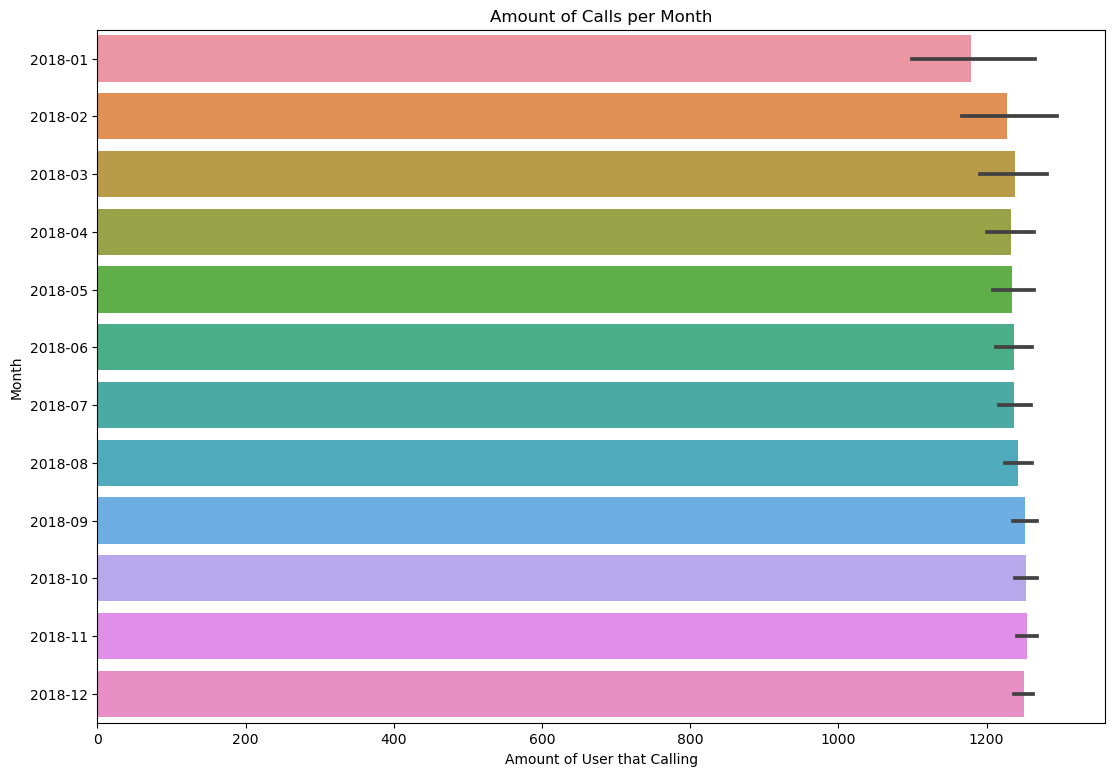

In [14]:
# create a bar graph
plt.figure(figsize=(13, 9))
plt.title('Amount of Calls per Month')
sns.barplot(x='user_id', y='months', data=amount_call.sort_values(by='months', ascending=True))
plt.xlabel('Amount of User that Calling')
plt.ylabel('Month')
plt.show()

### Jumlah Menit Panggilan Setiap Pengguna per Bulan <a id='call-minutes'></a>

Dari kesimpulan dataset sebelumnya, tidak ada masalah yang akan menghambat proses analisa. Penggunaan dataset untuk mengetahui jumlah menit panggilan adalah dataset `calls_clean` karena panggilan yang memiliki durasi = 0 sudah dihilangkan. 

Namun hal yang menjadi perhatian adalah perusahaan Megaline menerapkan apabila kelebihan 1 detik saja maka durasi panggilan dibulatkan ke menit teratas

In [15]:
# rounding up the duration
calls_clean['duration_up'] = np.ceil(calls_clean['duration'])

# change the dataset type
calls_clean['duration_up'] = calls_clean['duration_up'].astype('int')

# check the dataset
calls_clean.tail()

,id,user_id,call_date,duration,months,duration_up
137730,1499_199,1499,2018-11-21,8.72,2018-11,9
137731,1499_200,1499,2018-10-20,10.89,2018-10,11
137732,1499_201,1499,2018-09-21,8.12,2018-09,9
137733,1499_202,1499,2018-10-10,0.37,2018-10,1
137734,1499_203,1499,2018-12-29,13.86,2018-12,14


In [16]:
# check the dataset info
calls_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype    
---  ------       --------------   -----    
 0   id           110901 non-null  object   
 1   user_id      110901 non-null  int64    
 2   call_date    110901 non-null  object   
 3   duration     110901 non-null  float64  
 4   months       110901 non-null  period[M]
 5   duration_up  110901 non-null  int32    
dtypes: float64(1), int32(1), int64(1), object(2), period[M](1)
memory usage: 5.5+ MB


In [17]:
# create a pivot table
minutes_calls = pd.pivot_table( data = calls_clean,
                              index = ['user_id', 'months'],
                              values = 'duration_up',
                              aggfunc = 'sum').reset_index()

# check the dataset
minutes_calls.head()

,user_id,months,duration_up
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426


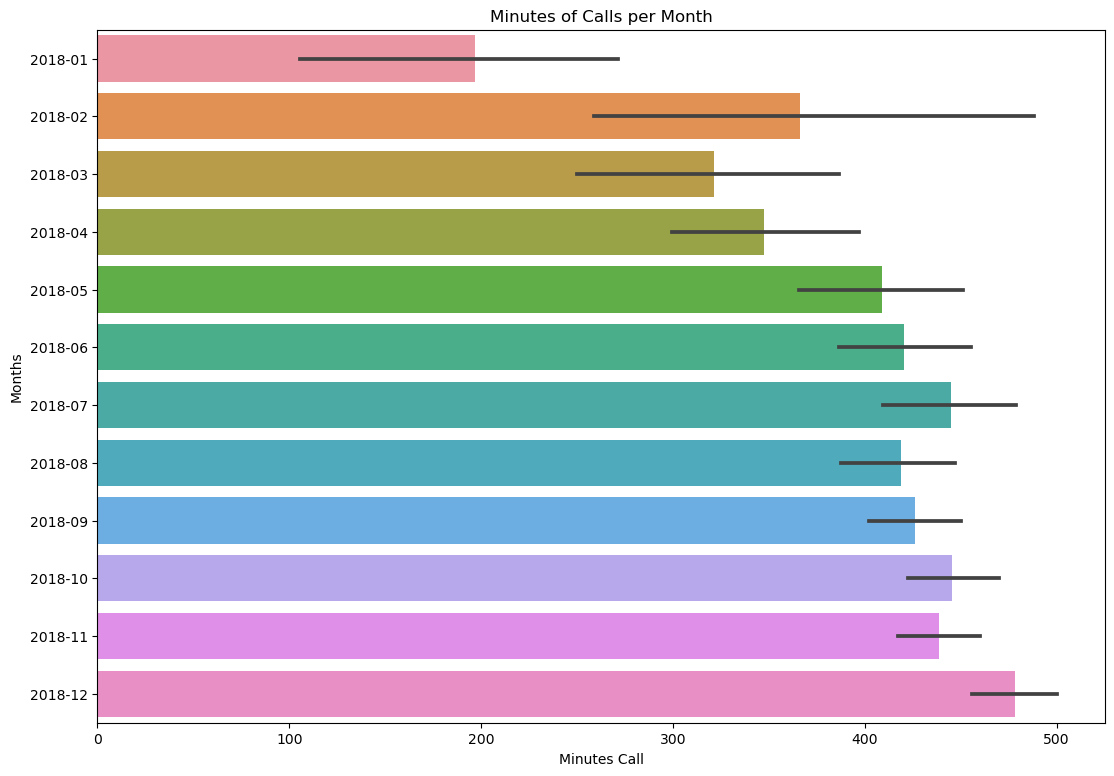

In [18]:
# create a bar graph
plt.figure(figsize=(13, 9))
plt.title('Minutes of Calls per Month')
sns.barplot(x='duration_up', y='months', data=minutes_calls.sort_values(by='months', ascending=True))
plt.xlabel('Minutes Call')
plt.ylabel('Months')
plt.show()

### Kesimpulan : <a id='call-summary'></a>

Dari hasil analisa mengenai jumlah panggilan dan jumlah menit panggilan telepon yang dilakukan oleh setiap pengguna, dapat disimpulkan bahwa:
1. Jumlah panggilan yang dilakukan naik setiap bulan selama tahun 2018
2. Jumlah menit yang digunakan oleh pengguna selama tahun 2018 cenderung naik

### Analisa SMS Setiap Pengguna per Bulan <a id='sms-analysis'></a>

Dataset yang digunakan adalah `messages`. Hal yang pertama dilakukan adalah mengecek kualitas dataset.

In [19]:
# check the dataset
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


**Deskripsi Dataset**

Dataset `messages` berisi tentang informasi pesan singkat (SMS) yang dilakukan oleh setiap pelanggan. Dataset `messages` mempunyai 3 kolom dengan informasi:
- `id` = identitas SMS yang dilakukan
- `user_id` = identitas pelanggan yang melakukan SMS
- `message_date` = tanggal dilakukannya SMS

In [20]:
# check the dataset shape
messages.shape

(76051, 3)

In [21]:
# check the dataset info
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
# check the null values
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

**Kesimpulan Dataset**

Dari hasil quality checking, dapat disimpulkan bahwa:
1. Terdapat 76.051 sms yang dilakukan
2. Tidak ada nilai yang hilang
3. Kolom `message_date` seharusnya mempunyai jenis data datetime

In [23]:
# add more columns and change datatype
messages['months'] = to_month(messages, 'message_date')

# check the dataset
messages.head()

,id,user_id,message_date,months
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


In [24]:
# create a pivot table
amount_messages = pd.pivot_table(
    data = messages,
    index = ['user_id', 'months'],
    values = 'id',
    aggfunc = 'count').reset_index()

# check the pivot table
amount_messages

,user_id,months,id
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


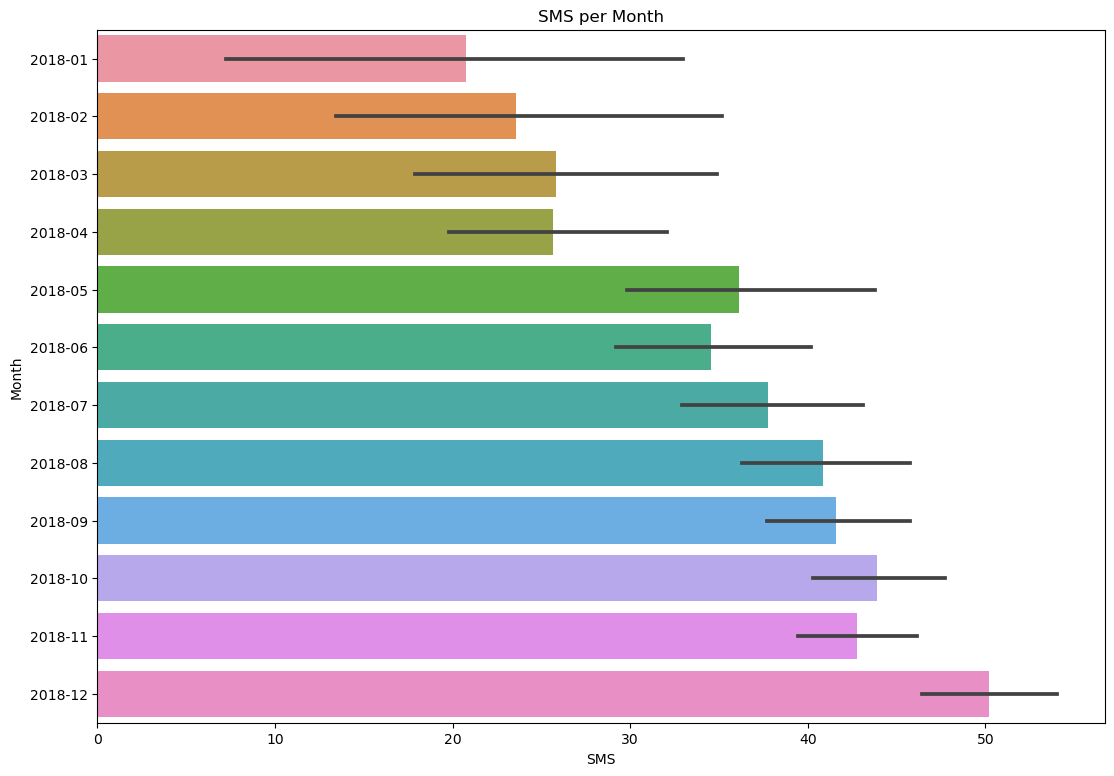

In [25]:
# create a bar graph
plt.figure(figsize=(13, 9))
plt.title('SMS per Month')
sns.barplot(x='id', y='months', data=amount_messages.sort_values(by='months', ascending=True))
plt.xlabel('SMS')
plt.ylabel('Month')
plt.show()

**Kesimpulan** <a id='sms-summary'></a>

Dari hasil analisa yang dilakukan adalah tiap bulannya penggunaan SMS setiap pengguna mengalami kenaikan.


### Analisa Penggunaan Volume Data Setiap Pengguna per Bulan <a id='data-analysis'></a>

Dataset yang digunakan adalah `internet`. Hal yang pertama dilakukan adalah mengecek kualitas dataset.

In [26]:
# check the dataset
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


**Deskripsi Dataset**

Dataset `internet` berisi tentang informasi penggunaan internet yang dilakukan oleh setiap pelanggan. Dataset `internet` mempunyai 4 kolom dengan informasi:
- `id` = identitas kegiatan internet yang dilakukan
- `user_id` = identitas pelanggan yang melakukan selancar internet
- `session_date` = tanggal dilakukannya kegiatan selancar internet
- `mb_used` = besar volume data yang digunakan selama 1 sesi dengan satuan mb

In [27]:
# check the dataset shape
internet.shape

(104825, 4)

In [28]:
# check the dataset info
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [29]:
# check the dataset missing values
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [30]:
# check the dataset description
round(internet['mb_used'].describe(), 2)

count    104825.00
mean        366.71
std         277.17
min           0.00
25%         136.08
50%         343.98
75%         554.61
max        1693.47
Name: mb_used, dtype: float64

**Kesimpulan Dataset**

Dari hasil *quality checking* dapat disimpulkan bahwa:
1. Terdapat 104.825 kegiatan selancar internet selama tahun 2018
2. Kolom `session_date` seharusnya mempunyai tipe data datetime
3. Tidak ada nilai yang hilang
4. Nilai minimal kolom `mb_used` adalah 0

Selain dari temuan diatas, *provider* Megaline juga menggunakan satuan gigabyte untuk menghitung tarif dan jumlah volume data yang digunakan. Namun, pada dataset ini masih menggunakan megabyte sehingga perlu dikonversi. Salah satu yang menjadi perhatian juga apabila kelebihan 1 mb saja maka akan dibulatkan ke gigabyte terdekat.

In [31]:
# change the dataset type
internet['months'] = to_month(internet, 'session_date')

# check the dataset
internet.head()

,id,user_id,session_date,mb_used,months
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12


In [32]:
# convert the mb to gb
internet['gb_used'] = internet['mb_used'] / 1024

# check the dataset
internet.head()

,id,user_id,session_date,mb_used,months,gb_used
0,1000_13,1000,2018-12-29,89.86,2018-12,0.087754
1,1000_204,1000,2018-12-31,0.00,2018-12,0.000000
2,1000_379,1000,2018-12-28,660.40,2018-12,0.644922
3,1000_413,1000,2018-12-26,270.99,2018-12,0.264639
4,1000_442,1000,2018-12-27,880.22,2018-12,0.859590


In [33]:
# check the odd values on mb_used
internet.loc[internet['mb_used'] == 0]

,id,user_id,session_date,mb_used,months,gb_used
1,1000_204,1000,2018-12-31,0.0,2018-12,0.0
14,1001_26,1001,2018-09-17,0.0,2018-09,0.0
16,1001_28,1001,2018-10-17,0.0,2018-10,0.0
34,1001_54,1001,2018-09-02,0.0,2018-09,0.0
43,1001_77,1001,2018-10-31,0.0,2018-10,0.0
...,...,...,...,...,...,...
104797,1499_192,1499,2018-09-19,0.0,2018-09,0.0
104804,1499_199,1499,2018-12-09,0.0,2018-12,0.0
104816,1499_211,1499,2018-09-26,0.0,2018-09,0.0
104817,1499_212,1499,2018-09-11,0.0,2018-09,0.0


In [34]:
# check the amount of odd data
len(internet.loc[internet['mb_used'] == 0])

# percentage of odd values
round(len(internet.loc[internet['mb_used'] == 0]) / len(internet['mb_used']) * 100, 2)

13.11

Data yang mempunyai nilai aneh pada kolom `mb_used` adalah 13,11% sehingga lebih baik di drop karena ada kemungkinan terpencet.

In [35]:
# create a clean dataset
internet_clean = internet.loc[internet['mb_used'] != 0]

# check the dataset
internet_clean.loc[internet_clean['mb_used'] == 0]

,id,user_id,session_date,mb_used,months,gb_used


In [36]:
# change the data type
internet_clean['months'] = to_month(internet_clean, 'session_date')

#check the dataset
internet_clean.head()

,id,user_id,session_date,mb_used,months,gb_used
0,1000_13,1000,2018-12-29,89.86,2018-12,0.087754
2,1000_379,1000,2018-12-28,660.40,2018-12,0.644922
3,1000_413,1000,2018-12-26,270.99,2018-12,0.264639
4,1000_442,1000,2018-12-27,880.22,2018-12,0.859590
5,1001_0,1001,2018-08-24,284.68,2018-08,0.278008


In [37]:
# create a pivot table
amount_internet = pd.pivot_table(
    data = internet_clean,
    index = ['user_id', 'months'],
    values = 'mb_used',
    aggfunc = 'sum').reset_index()

# check the pivot table
amount_internet

,user_id,months,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


In [38]:
# convert the mb to gb
amount_internet['gb_used'] = amount_internet['mb_used'] / 1024

# check the table
amount_internet

,user_id,months,mb_used,gb_used
0,1000,2018-12,1901.47,1.856904
1,1001,2018-08,6919.15,6.756982
2,1001,2018-09,13314.82,13.002754
3,1001,2018-10,22330.49,21.807119
4,1001,2018-11,18504.30,18.070605
...,...,...,...,...
2272,1498,2018-12,23137.69,22.595400
2273,1499,2018-09,12984.76,12.680430
2274,1499,2018-10,19492.43,19.035576
2275,1499,2018-11,16813.83,16.419756


In [39]:
# rounding up the volume data
amount_internet['gb_used'] = np.ceil(amount_internet['gb_used'])

# change the datatype
amount_internet['gb_used'] = amount_internet['gb_used'].astype('int')

# check the dataset
amount_internet

,user_id,months,mb_used,gb_used
0,1000,2018-12,1901.47,2
1,1001,2018-08,6919.15,7
2,1001,2018-09,13314.82,14
3,1001,2018-10,22330.49,22
4,1001,2018-11,18504.30,19
...,...,...,...,...
2272,1498,2018-12,23137.69,23
2273,1499,2018-09,12984.76,13
2274,1499,2018-10,19492.43,20
2275,1499,2018-11,16813.83,17


In [40]:
# drop the column that not needed
amount_internet.drop('mb_used', axis=1, inplace=True)

# check the dataset
amount_internet.head()

,user_id,months,gb_used
0,1000,2018-12,2
1,1001,2018-08,7
2,1001,2018-09,14
3,1001,2018-10,22
4,1001,2018-11,19


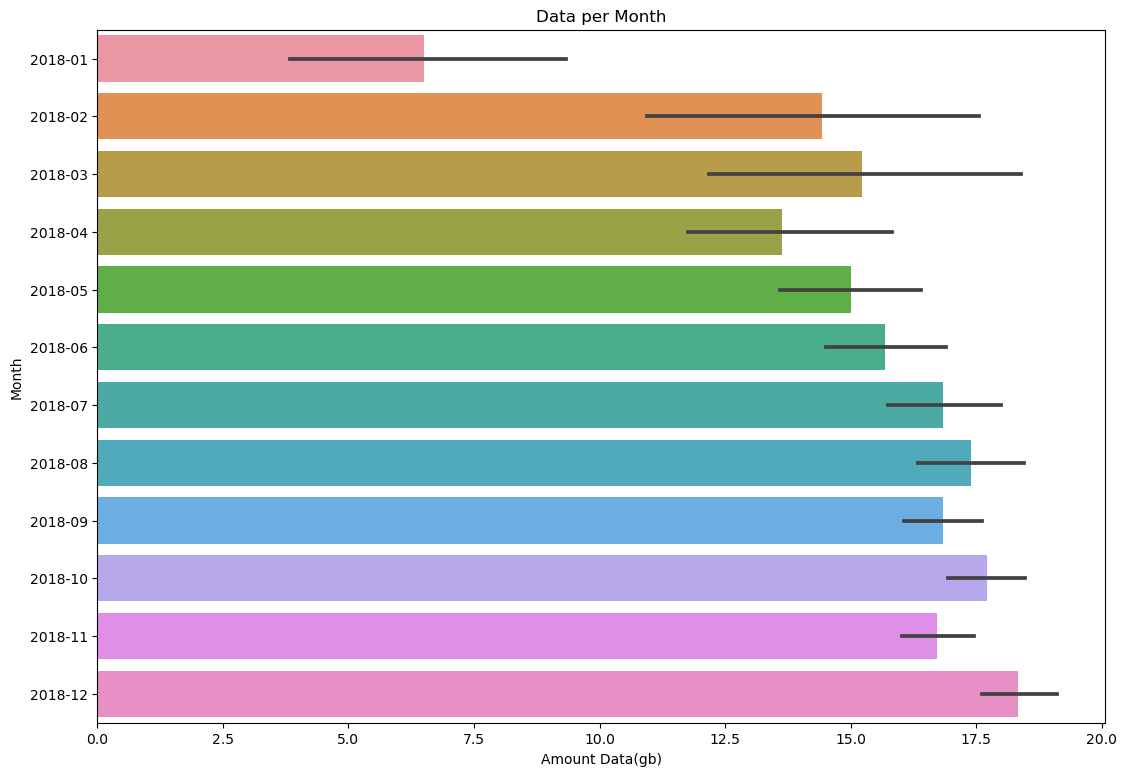

In [102]:
# create a bar graph
plt.figure(figsize=(13, 9))
plt.title('Data per Month')
sns.barplot(x='gb_used', y='months', data=amount_internet.sort_values(by='months', ascending=True))
plt.xlabel('Amount Data(gb)')
plt.ylabel('Month')
plt.show()

**Kesimpulan** <a id='data-summary'></a>

Dari hasil analisa diatas, dapat disimpulkan bahwa penggunaan volume data setiap bulan selama 2018 naik.

## Analisa Pendapatan Bulanan dari Setiap Pengguna <a id='revenue-total'></a>

Jumlah dataset yang diberikan adalah 5 dataset, dan untuk menghitung *revenue* atau pendapata yang dihasilkan oleh setiap pengguna harus menggabungkan 5 dataset tersebut.

In [42]:
internet.head()

,id,user_id,session_date,mb_used,months,gb_used
0,1000_13,1000,2018-12-29,89.86,2018-12,0.087754
1,1000_204,1000,2018-12-31,0.00,2018-12,0.000000
2,1000_379,1000,2018-12-28,660.40,2018-12,0.644922
3,1000_413,1000,2018-12-26,270.99,2018-12,0.264639
4,1000_442,1000,2018-12-27,880.22,2018-12,0.859590


In [43]:
# create a key column
temp_month = pd.DataFrame(internet.months.unique(), columns=['months']).sort_values('months')
temp_month['key'] = 1

# check the key column
temp_month.head()

,months,key
11,2018-01,1
10,2018-02,1
8,2018-03,1
9,2018-04,1
7,2018-05,1


In [44]:
# create a key column
temp_user = pd.DataFrame(users.user_id.unique(), columns=['user_id'])
temp_user['key'] = 1

# check the key column
temp_user.head()

,user_id,key
0,1000,1
1,1001,1
2,1002,1
3,1003,1
4,1004,1


In [45]:
# cross join method
df = temp_user.merge(temp_month, on='key', how='inner')

# check the new dataset
df.head()

,user_id,key,months
0,1000,1,2018-01
1,1000,1,2018-02
2,1000,1,2018-03
3,1000,1,2018-04
4,1000,1,2018-05


Pada dataset `plans`, kolom volume data yang didapatkan masih menggunakan mb sehingga perlu di ubah menjadi gb.

In [46]:
# convert mb to gb
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

# rounding up
plans['gb_per_month_included'] = np.ceil(plans['gb_per_month_included'])

# check the data
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [47]:
# join all table that needed
df = df.merge(users, on='user_id', how='left')
df = df.merge(plans, left_on='plan', right_on='plan_name', how='left')
df = df.merge(amount_internet, on=['user_id', 'months'], how='left')
df = df.merge(minutes_calls, on=['user_id', 'months'], how='left')
df = df.merge(amount_messages, on=['user_id', 'months'], how='left')

# check the dataset
df.head()

,user_id,key,months,first_name,last_name,age,city,reg_date,plan,churn_date,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,gb_used,duration_up,id
0,1000,1,2018-01,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,...,3000,70,7,0.01,0.01,ultimate,30.0,NaN,NaN,NaN
1,1000,1,2018-02,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,...,3000,70,7,0.01,0.01,ultimate,30.0,NaN,NaN,NaN
2,1000,1,2018-03,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,...,3000,70,7,0.01,0.01,ultimate,30.0,NaN,NaN,NaN
3,1000,1,2018-04,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,...,3000,70,7,0.01,0.01,ultimate,30.0,NaN,NaN,NaN
4,1000,1,2018-05,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,...,3000,70,7,0.01,0.01,ultimate,30.0,NaN,NaN,NaN


In [48]:
# drop the column that not needed
df.drop(
    ['first_name', 'last_name', 'age', 'plan_name', 'key'], 
    axis=1, inplace=True)

# check the dataset
df.head()

,user_id,months,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,gb_used,duration_up,id
0,1000,2018-01,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,30.0,NaN,NaN,NaN
1,1000,2018-02,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,30.0,NaN,NaN,NaN
2,1000,2018-03,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,30.0,NaN,NaN,NaN
3,1000,2018-04,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,30.0,NaN,NaN,NaN
4,1000,2018-05,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,30.0,NaN,NaN,NaN


### Quality Checking <a id='qc-revenue'></a>

Seperti dataset sebelumnya, dataset yang telah dibuat juga harus dilakukan *quality checking*

In [49]:
# check the dataset shape
df.shape

(6000, 17)

In [50]:
# check the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                6000 non-null   int64    
 1   months                 6000 non-null   period[M]
 2   city                   6000 non-null   object   
 3   reg_date               6000 non-null   object   
 4   plan                   6000 non-null   object   
 5   churn_date             408 non-null    object   
 6   messages_included      6000 non-null   int64    
 7   mb_per_month_included  6000 non-null   int64    
 8   minutes_included       6000 non-null   int64    
 9   usd_monthly_pay        6000 non-null   int64    
 10  usd_per_gb             6000 non-null   int64    
 11  usd_per_message        6000 non-null   float64  
 12  usd_per_minute         6000 non-null   float64  
 13  gb_per_month_included  6000 non-null   float64  
 14  gb_used                2

In [51]:
# check the dataset null values
df.isna().sum()

user_id                     0
months                      0
city                        0
reg_date                    0
plan                        0
churn_date               5592
messages_included           0
mb_per_month_included       0
minutes_included            0
usd_monthly_pay             0
usd_per_gb                  0
usd_per_message             0
usd_per_minute              0
gb_per_month_included       0
gb_used                  3723
duration_up              3744
id                       4194
dtype: int64

In [52]:
# check the dataset description
round(df.describe(),2)

,user_id,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,gb_used,duration_up,id
count,6000.00,6000.00,6000.00,6000.0,6000.00,6000.00,6000.00,6000.00,6000.00,2277.00,2256.00,1806.00
mean,1249.50,355.90,20305.92,1305.0,36.10,9.03,0.02,0.02,19.83,16.99,436.32,42.11
std,144.35,443.92,7177.45,1168.2,23.36,1.40,0.01,0.01,7.01,7.69,231.71,33.12
min,1000.00,50.00,15360.00,500.0,20.00,7.00,0.01,0.01,15.00,1.00,2.00,1.00
25%,1124.75,50.00,15360.00,500.0,20.00,7.00,0.01,0.01,15.00,13.00,275.00,17.00
50%,1249.50,50.00,15360.00,500.0,20.00,10.00,0.03,0.03,15.00,17.00,429.00,34.00
75%,1374.25,1000.00,30720.00,3000.0,70.00,10.00,0.03,0.03,30.00,21.00,575.25,59.00
max,1499.00,1000.00,30720.00,3000.0,70.00,10.00,0.03,0.03,30.00,70.00,1510.00,266.00


**Kesimpulan Dataset**

Dari hasil analisis data diatas, dapat disimpulkan:
1. Data yang diterima adalah data dari 6.000 nasabah
2. Beberapa kolom yang memiliki nilai yang hilang
3. Beberapa tipe data tidak sesuai seperti kolom `reg_date` dan `churn_date` harusnya memiliki tipe data datetime

In [53]:
# change data type
df['reg_date'] = to_month(df, 'reg_date')
df['churn_date'] = to_month(df, 'churn_date')

# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                6000 non-null   int64    
 1   months                 6000 non-null   period[M]
 2   city                   6000 non-null   object   
 3   reg_date               6000 non-null   period[M]
 4   plan                   6000 non-null   object   
 5   churn_date             408 non-null    period[M]
 6   messages_included      6000 non-null   int64    
 7   mb_per_month_included  6000 non-null   int64    
 8   minutes_included       6000 non-null   int64    
 9   usd_monthly_pay        6000 non-null   int64    
 10  usd_per_gb             6000 non-null   int64    
 11  usd_per_message        6000 non-null   float64  
 12  usd_per_minute         6000 non-null   float64  
 13  gb_per_month_included  6000 non-null   float64  
 14  gb_used                2

In [54]:
#remove unecessary data
df = df.loc[((df.reg_date <= df.months) & (df.churn_date >= df.months)) | (df.churn_date.isna())]

#check the dataset
df.head()

,user_id,months,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,gb_used,duration_up,id
0,1000,2018-01,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,30.0,NaN,NaN,NaN
1,1000,2018-02,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,30.0,NaN,NaN,NaN
2,1000,2018-03,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,30.0,NaN,NaN,NaN
3,1000,2018-04,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,30.0,NaN,NaN,NaN
4,1000,2018-05,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,30.0,NaN,NaN,NaN


Beberapa pengguna memiliki penggunaan data lebih dari yang seharusnya. Untuk memudahkan perhitungan, dapat dibuat fungsi untuk mengkalkulasi biaya tambahan yang perlu dibayarkan.

In [55]:
# create function to calculate extra pay
def extra_pay (value, max_value, cost):
  extra_pay = value - max_value
  if extra_pay > 0:
    return cost * extra_pay
  else:
    return 0

# calculate the extra cost for internet
df['extra_cost_internet'] = df.apply(
    lambda row: extra_pay(value=row['gb_used'], 
                            max_value=row['gb_per_month_included'], cost=row['usd_per_gb']), axis=1)

# check the data
df.tail()

,user_id,months,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,gb_used,duration_up,id,extra_cost_internet
5995,1499,2018-08,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,10,0.03,0.03,15.0,NaN,NaN,NaN,0.0
5996,1499,2018-09,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,10,0.03,0.03,15.0,13.0,346.0,NaN,0.0
5997,1499,2018-10,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,10,0.03,0.03,15.0,20.0,385.0,NaN,50.0
5998,1499,2018-11,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,10,0.03,0.03,15.0,17.0,308.0,NaN,20.0
5999,1499,2018-12,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,10,0.03,0.03,15.0,22.0,496.0,NaN,70.0


In [56]:
# calculate the extra cost for call
df['extra_cost_call'] = df.apply(
    lambda row: extra_pay(value=row['duration_up'], 
                            max_value=row['minutes_included'], cost=row['usd_per_minute']), axis=1)

# check the data
df.tail()

,user_id,months,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,gb_used,duration_up,id,extra_cost_internet,extra_cost_call
5995,1499,2018-08,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,10,0.03,0.03,15.0,NaN,NaN,NaN,0.0,0.0
5996,1499,2018-09,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,10,0.03,0.03,15.0,13.0,346.0,NaN,0.0,0.0
5997,1499,2018-10,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,10,0.03,0.03,15.0,20.0,385.0,NaN,50.0,0.0
5998,1499,2018-11,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,10,0.03,0.03,15.0,17.0,308.0,NaN,20.0,0.0
5999,1499,2018-12,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,10,0.03,0.03,15.0,22.0,496.0,NaN,70.0,0.0


In [57]:
# calculate the extra cost for messages
df['extra_cost_messages'] = df.apply(
    lambda row: extra_pay(value=row['id'], 
                            max_value=row['messages_included'], cost=row['usd_per_message']), axis=1)

# check the data
df.tail()

,user_id,months,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,gb_used,duration_up,id,extra_cost_internet,extra_cost_call,extra_cost_messages
5995,1499,2018-08,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,10,0.03,0.03,15.0,NaN,NaN,NaN,0.0,0.0,0.0
5996,1499,2018-09,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,10,0.03,0.03,15.0,13.0,346.0,NaN,0.0,0.0,0.0
5997,1499,2018-10,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,10,0.03,0.03,15.0,20.0,385.0,NaN,50.0,0.0,0.0
5998,1499,2018-11,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,10,0.03,0.03,15.0,17.0,308.0,NaN,20.0,0.0,0.0
5999,1499,2018-12,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,10,0.03,0.03,15.0,22.0,496.0,NaN,70.0,0.0,0.0


In [58]:
# create a new column for extra cost
df['extra_cost'] = df['extra_cost_internet'] + df['extra_cost_call'] + df['extra_cost_messages']

# check the data
df.tail()

,user_id,months,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,...,usd_per_message,usd_per_minute,gb_per_month_included,gb_used,duration_up,id,extra_cost_internet,extra_cost_call,extra_cost_messages,extra_cost
5995,1499,2018-08,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,...,0.03,0.03,15.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
5996,1499,2018-09,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,...,0.03,0.03,15.0,13.0,346.0,NaN,0.0,0.0,0.0,0.0
5997,1499,2018-10,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,...,0.03,0.03,15.0,20.0,385.0,NaN,50.0,0.0,0.0,50.0
5998,1499,2018-11,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,...,0.03,0.03,15.0,17.0,308.0,NaN,20.0,0.0,0.0,20.0
5999,1499,2018-12,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,...,0.03,0.03,15.0,22.0,496.0,NaN,70.0,0.0,0.0,70.0


In [59]:
# revenue every user per month
df['revenue'] = df['usd_monthly_pay'] + df['extra_cost']

# check the data
df.tail()

,user_id,months,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,...,usd_per_minute,gb_per_month_included,gb_used,duration_up,id,extra_cost_internet,extra_cost_call,extra_cost_messages,extra_cost,revenue
5995,1499,2018-08,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,...,0.03,15.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,20.0
5996,1499,2018-09,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,...,0.03,15.0,13.0,346.0,NaN,0.0,0.0,0.0,0.0,20.0
5997,1499,2018-10,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,...,0.03,15.0,20.0,385.0,NaN,50.0,0.0,0.0,50.0,70.0
5998,1499,2018-11,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,...,0.03,15.0,17.0,308.0,NaN,20.0,0.0,0.0,20.0,40.0
5999,1499,2018-12,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,50,15360,500,20,...,0.03,15.0,22.0,496.0,NaN,70.0,0.0,0.0,70.0,90.0


In [60]:
# create a pivot table for the revenue per user
rev_user = pd.pivot_table(
    data = df,
    index = 'user_id',
    columns = 'months',
    values='revenue',
    aggfunc='sum'
)

# check the dataset
rev_user

months,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
user_id,,,,,,,,,,,,
1000,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.00,70.0,70.00
1001,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,90.09,60.0,60.00
1002,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.00,60.0,20.00
1003,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.00,20.0,158.12
1004,20.0,20.0,20.0,20.0,20.0,80.0,110.0,150.0,60.0,20.00,90.0,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,100.0,143.30,120.0,110.00
1496,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,40.0,20.00,20.0,40.00
1497,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.00,70.0,70.00


In [61]:
# create a pivot table for the total revenue per user
rev_total = pd.pivot_table(
    data = df,
    index = ['user_id', 'plan'],
    values='revenue',
    aggfunc='sum'
).sort_values(by='revenue', ascending=False)

# check the dataset
rev_total.head()

,,revenue
user_id,plan,
1268,surf,1870.86
1240,surf,1754.45
1292,surf,1700.00
1147,surf,1674.83
1359,surf,1621.11


In [103]:
# check the bottom 5
rev_total.tail()

,user_id,plan,revenue
495,1416,surf,70.00
496,1186,ultimate,70.00
497,1040,surf,40.00
498,1129,surf,40.00
499,1180,surf,24.23


**Kesimpulan** <a id='summary-revenue'></a>

Dari hasil analisa diatas, dapat disimpulkan bahwa user yang menyumbang pemasukan terbanyak adalah user dengan paket surf dengan revenue $ 1870,86 selama setahun.

## Analisa Perilaku Pengguna Berdasarkan Paket per Bulan <a id='behaviour-plan'></a>

Data yang diberikan harus dianalisis dengan menemukan menit, pesan, dan volume penggunaan data seluler yang dibutuhkan pengguna setiap paket per bulan. Perilaku pengguna ini dapat dilihat dengan menganalisa histogram dan distribusi dari penggunaan lama telepon, jumlah pesan, dan volume penggunaan data.

In [62]:
# check the dataset
df.head()

,user_id,months,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,...,usd_per_minute,gb_per_month_included,gb_used,duration_up,id,extra_cost_internet,extra_cost_call,extra_cost_messages,extra_cost,revenue
0,1000,2018-01,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,1000,30720,3000,70,...,0.01,30.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,70.0
1,1000,2018-02,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,1000,30720,3000,70,...,0.01,30.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,70.0
2,1000,2018-03,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,1000,30720,3000,70,...,0.01,30.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,70.0
3,1000,2018-04,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,1000,30720,3000,70,...,0.01,30.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,70.0
4,1000,2018-05,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,1000,30720,3000,70,...,0.01,30.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,70.0


In [63]:
# create a new dataset
df_01 = df.drop(
    ['reg_date', 'churn_date', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
     'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'gb_per_month_included', 'extra_cost_internet', 'extra_cost_call', 'extra_cost_messages',
     'extra_cost', 'revenue'], 
    axis=1)

# check the dataset
df_01.head()

,user_id,months,city,plan,gb_used,duration_up,id
0,1000,2018-01,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN,NaN,NaN
1,1000,2018-02,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN,NaN,NaN
2,1000,2018-03,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN,NaN,NaN
3,1000,2018-04,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN,NaN,NaN
4,1000,2018-05,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN,NaN,NaN


In [64]:
# rename the column
df_01.rename(columns = {'gb_used':'data_volume', 'duration_up':'minute_call',
                              'id':'messages'}, inplace = True)
# check the dataset
df_01.head()

,user_id,months,city,plan,data_volume,minute_call,messages
0,1000,2018-01,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN,NaN,NaN
1,1000,2018-02,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN,NaN,NaN
2,1000,2018-03,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN,NaN,NaN
3,1000,2018-04,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN,NaN,NaN
4,1000,2018-05,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN,NaN,NaN


### Pengguna Paket Data Surf <a id='behaviour-surf'></a>

In [65]:
# create a new dataset for 'surf'
df_surf = df_01.loc[df_01['plan'] == 'surf']

# check the dataset
df_surf.head()

,user_id,months,city,plan,data_volume,minute_call,messages
12,1001,2018-01,"Seattle-Tacoma-Bellevue, WA MSA",surf,NaN,NaN,NaN
13,1001,2018-02,"Seattle-Tacoma-Bellevue, WA MSA",surf,NaN,NaN,NaN
14,1001,2018-03,"Seattle-Tacoma-Bellevue, WA MSA",surf,NaN,NaN,NaN
15,1001,2018-04,"Seattle-Tacoma-Bellevue, WA MSA",surf,NaN,NaN,NaN
16,1001,2018-05,"Seattle-Tacoma-Bellevue, WA MSA",surf,NaN,NaN,NaN


In [66]:
# data description for surf
round(df_surf.describe(), 2)

,user_id,data_volume,minute_call,messages
count,3912.00,1533.00,1519.00,1203.00
mean,1247.78,16.83,436.99,40.03
std,140.81,7.70,229.81,33.15
min,1001.00,1.00,2.00,1.00
25%,1127.00,12.00,279.00,16.00
50%,1248.00,17.00,430.00,32.00
75%,1362.00,21.00,579.00,54.00
max,1499.00,70.00,1510.00,266.00


In [67]:
# create a pivot table for mean value
surf_pivot_mean = pd.pivot_table(
    data = df_surf,
    index = 'months',
    aggfunc = 'mean'
).reset_index()
surf_pivot_mean.drop('user_id', axis=1, inplace=True)

round(surf_pivot_mean, 2)

,months,data_volume,messages,minute_call
0,2018-01,5.00,21.00,203.00
1,2018-02,12.22,21.60,297.00
2,2018-03,13.57,21.94,330.00
3,2018-04,12.47,24.17,351.54
4,2018-05,14.30,33.02,410.24
5,2018-06,15.81,33.62,435.79
6,2018-07,17.02,35.95,453.73
7,2018-08,17.20,37.60,417.85
8,2018-09,16.78,39.52,420.73
9,2018-10,17.64,42.19,440.10


In [68]:
# calculate standard deviation
data_surf_std = round(df_surf.groupby(by=['months']).std().reset_index(), 2)

# drop unused column
data_surf_std.drop('user_id', axis=1, inplace=True)

# check the data
data_surf_std

,months,data_volume,minute_call,messages
0,2018-01,4.24,125.87,NaN
1,2018-02,6.44,228.53,22.65
2,2018-03,8.00,189.23,18.76
3,2018-04,7.36,225.54,23.11
4,2018-05,7.50,238.62,29.46
5,2018-06,6.60,209.99,30.60
6,2018-07,7.72,244.54,30.13
7,2018-08,8.20,228.30,31.83
8,2018-09,6.93,211.14,30.71
9,2018-10,7.61,221.72,35.35


In [69]:
# create a variance
data_surf_std['data_volume_var'] = data_surf_std['data_volume'] ** 2
data_surf_std['minute_call_var'] = data_surf_std['minute_call'] ** 2
data_surf_std['messages_var'] = data_surf_std['messages'] ** 2

# check the data
data_surf_std

,months,data_volume,minute_call,messages,data_volume_var,minute_call_var,messages_var
0,2018-01,4.24,125.87,NaN,17.9776,15843.2569,NaN
1,2018-02,6.44,228.53,22.65,41.4736,52225.9609,513.0225
2,2018-03,8.00,189.23,18.76,64.0000,35807.9929,351.9376
3,2018-04,7.36,225.54,23.11,54.1696,50868.2916,534.0721
4,2018-05,7.50,238.62,29.46,56.2500,56939.5044,867.8916
5,2018-06,6.60,209.99,30.60,43.5600,44095.8001,936.3600
6,2018-07,7.72,244.54,30.13,59.5984,59799.8116,907.8169
7,2018-08,8.20,228.30,31.83,67.2400,52120.8900,1013.1489
8,2018-09,6.93,211.14,30.71,48.0249,44580.0996,943.1041
9,2018-10,7.61,221.72,35.35,57.9121,49159.7584,1249.6225


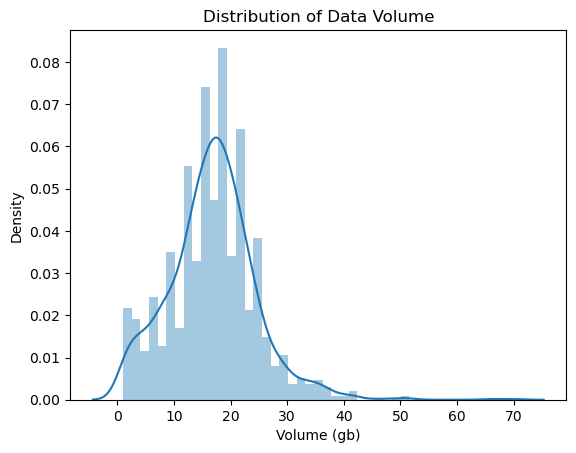

In [108]:
# create a histogram for volume data
sns.distplot(df_surf['data_volume']);
plt.title('Distribution of Data Volume')
plt.xlabel('Volume (gb)')
plt.show()

**Hasil temuan analisis (data)** : <a id='data-surf'></a>
1. Rata-rata penggunaan per bulan paling tinggi terjadi pada bulan Desember dengan penggunaan data 18,35 ± 8,21 gb per bulan.
2. Rata-rata penggunaan per bulan paling rendah terjadi pada bulan Januari dengan penggunaan data 5,00 ± 4,24 gb per bulan
3. Distribusi penggunaan data per bulan paling tinggi ada diangka 10 - 20 gb

**Kesimpulan** : <a id='data-surf-summary'></a>

Penggunaan data per bulan yang masih ditanggung oleh paket surf adalah 15 gb, sehingga sebagian besar dari pengguna paket surf menggunakan data lebih dari yang disediakan dengan biaya tambahan 10 usd per gb. Dari data diatas, dapat disimpulkan bahwa seorang pelanggan dengan paket surf dapat menyumbang ± 5 usd per bulan.

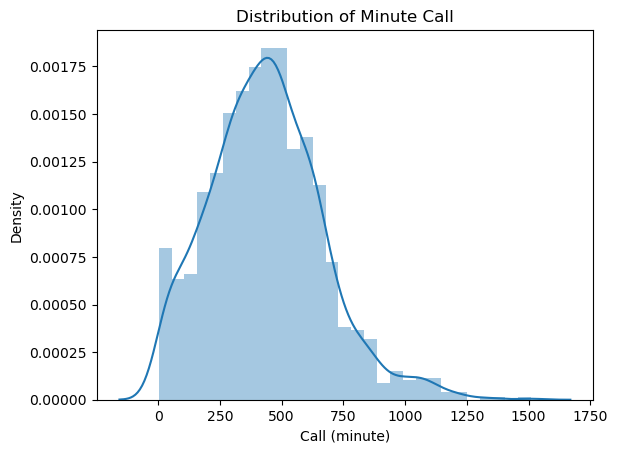

In [107]:
# create a histogram for minute call
sns.distplot(df_surf['minute_call']);
plt.title('Distribution of Minute Call')
plt.xlabel('Call (minute)')
plt.show()

**Hasil temuan analisis (telepon)**: <a id='telp-surf'></a>
1. Rata-rata penggunaan telepon paling tinggi terdapat pada bulan Desember sebanyak 48,22 ± 246,03 menit per bulan
2. Rata-rata penggunaan telepon paling rendah terdapat pada bulan Januari sebanyak 21,00 ± 125,87 menit per bulan
3. Distribusi penggunaan telepon per bulan paling banyak ada pada rentang 250 - 500 menit

**Kesimpulan**: <a id='telp-surf-summary'></a>

Penggunaan telepon yang masih ditanggung oleh paket surf adalah 500 menit. Dari data diatas, dapat disimpulkan sebagian besar pengguna surf tidak menggunakan telepon lebih dari kuota yang disediakan.

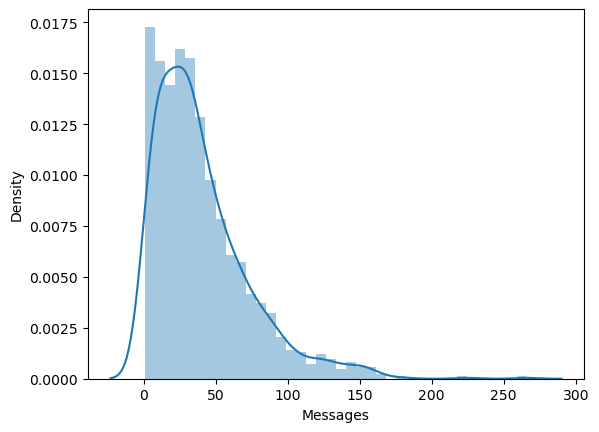

In [109]:
# create a histogram for messages
sns.distplot(df_surf['messages']);
plt.xlabel('Messages')
plt.show()

**Hasil temuan analisis (SMS)**: <a id='message-surf'></a>

1. Penggunaan sms paling tinggi terjadi pada bulan Desember dengan jumlah sms rata-rata 487 ± 37 sms per bulan.
2. Penggunana sms paling rendah terjadi pada bulan Januari dengan jumlah sms rata-rata 203 sms per bulan.
3. Distribusi penggunaan sms paling banyak terletak pada 0 - 50 sms per bulan

**Kesimpulan**: <a id='message-surf-summary'></a>

Penggunaan sms yang masih ditanggung oleh paket surf adalah 50 sms. Dari data diatas, dapat disimpulkan bahwa sebagian besar pengguna paket surf tidak menggunakan sms lebih dari kuota yang disediakan.

### Kesimpulan Analisa Perilaku Pengguna : Paket Data Surf <a id='behaviour-surf-summary'></a>

Pengguna paket internet surf cenderung menggunakan paket data berlebihan dibandingkan dengan penggunaan telepon atau sms. Sehingga hal ini bisa dimaksimalkan untuk mendapatkan *revenue* yang lebih besar. 

### Pengguna Paket Data Ultimate <a id='behaviour-ult'></a>

In [73]:
# create a new dataset for 'ultimate'
df_ultimate = df_01.loc[df['plan'] == 'ultimate']

# check the dataset
df_ultimate.head()

,user_id,months,city,plan,data_volume,minute_call,messages
0,1000,2018-01,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN,NaN,NaN
1,1000,2018-02,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN,NaN,NaN
2,1000,2018-03,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN,NaN,NaN
3,1000,2018-04,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN,NaN,NaN
4,1000,2018-05,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN,NaN,NaN


In [74]:
# data description for ultimate
round(df_ultimate.describe(), 2)

,user_id,data_volume,minute_call,messages
count,1872.00,707.00,700.00,574.00
mean,1257.59,17.36,435.07,46.62
std,150.69,7.68,237.89,33.02
min,1000.00,1.00,10.00,1.00
25%,1126.00,13.00,262.75,21.00
50%,1253.00,17.00,427.50,41.00
75%,1401.00,21.00,566.00,66.00
max,1497.00,46.00,1369.00,166.00


In [75]:
# create a pivot table for mean value
ult_pivot_mean = pd.pivot_table(
    data = df_ultimate,
    index = 'months',
    aggfunc = 'mean'
).reset_index()
ult_pivot_mean.drop('user_id', axis=1, inplace=True)

# check the pivot table
round(ult_pivot_mean, 2)

,months,data_volume,messages,minute_call
0,2018-01,7.25,20.67,193.50
1,2018-02,17.29,25.17,470.33
2,2018-03,18.42,34.71,304.25
3,2018-04,16.33,28.94,336.86
4,2018-05,16.86,44.33,406.24
5,2018-06,15.43,36.29,387.44
6,2018-07,16.49,41.21,427.07
7,2018-08,17.84,48.52,417.49
8,2018-09,17.19,46.72,440.52
9,2018-10,17.89,47.05,455.70


In [76]:
# calculate standard deviation
data_ult_std = round(df_ultimate.groupby(by=['months']).std().reset_index(), 2)

# drop unused column
data_ult_std.drop('user_id', axis=1, inplace=True)

# check the data
data_ult_std

,months,data_volume,minute_call,messages
0,2018-01,3.86,128.73,17.62
1,2018-02,6.16,233.12,21.57
2,2018-03,11.77,248.97,24.78
3,2018-04,9.26,186.79,22.65
4,2018-05,7.36,209.38,35.31
5,2018-06,8.30,194.69,28.41
6,2018-07,8.02,269.38,29.29
7,2018-08,7.67,230.86,32.14
8,2018-09,6.85,240.93,30.05
9,2018-10,7.25,230.82,33.34


In [77]:
# create a variance
data_ult_std['data_volume_var'] = data_ult_std['data_volume'] ** 2
data_ult_std['minute_call_var'] = data_ult_std['minute_call'] ** 2
data_ult_std['messages_var'] = data_ult_std['messages'] ** 2

# check the data
data_ult_std

,months,data_volume,minute_call,messages,data_volume_var,minute_call_var,messages_var
0,2018-01,3.86,128.73,17.62,14.8996,16571.4129,310.4644
1,2018-02,6.16,233.12,21.57,37.9456,54344.9344,465.2649
2,2018-03,11.77,248.97,24.78,138.5329,61986.0609,614.0484
3,2018-04,9.26,186.79,22.65,85.7476,34890.5041,513.0225
4,2018-05,7.36,209.38,35.31,54.1696,43839.9844,1246.7961
5,2018-06,8.30,194.69,28.41,68.8900,37904.1961,807.1281
6,2018-07,8.02,269.38,29.29,64.3204,72565.5844,857.9041
7,2018-08,7.67,230.86,32.14,58.8289,53296.3396,1032.9796
8,2018-09,6.85,240.93,30.05,46.9225,58047.2649,903.0025
9,2018-10,7.25,230.82,33.34,52.5625,53277.8724,1111.5556


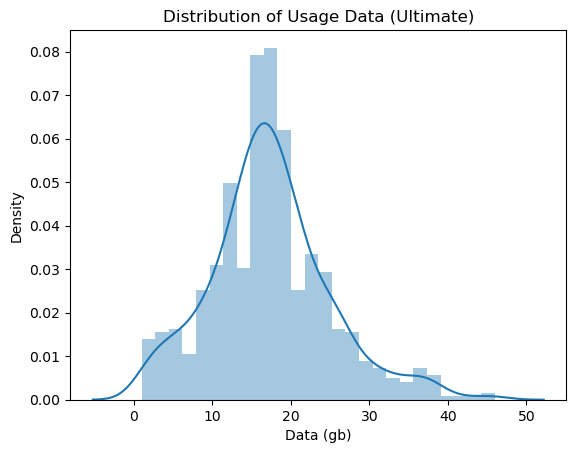

In [110]:
# create a histogram for volume data
sns.distplot(df_ultimate['data_volume']);
plt.title('Distribution of Usage Data (Ultimate)')
plt.xlabel('Data (gb)')
plt.show()

**Hasil temuan analisa (data)**: <a id='data-ult'></a>
1. Rata-rata penggunaan data paling tinggi ada di bulan Desember sebanyak 18,38 ± 7,73 gb per bulan
2. Rata-rata penggunaan data paling rendah ada di bulan Januari sebanyak 7,25 ± 3,38 gb per bulan
3. Distribusi penggunaan tertinggi untuk data pada paket ultimate terletak di tentang 10 - 20 gb per bulan

**Kesimpulan** : <a id='data-ult-summary'></a>

Penggunaan paket data untuk jenis ultimate yang masih di-cover oleh Megaline adalah 30 gb. Sehingga, dari data diatas sebagian besar pengguna paket ultimate tidak menggunakan paket data diluar dari kuota yang disediakan.

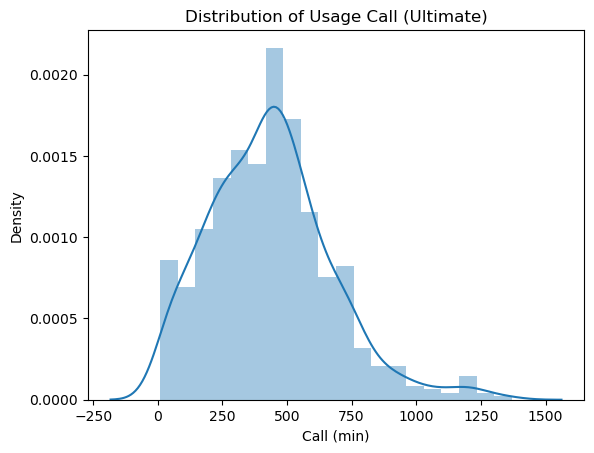

In [111]:
# create a histogram for calls
sns.distplot(df_ultimate['minute_call']);
plt.title('Distribution of Usage Call (Ultimate)')
plt.xlabel('Call (min)')
plt.show()

**Hasil temuan analisa**: <a id='telp-ult'></a>
1. Rata-rata penggunaan telepon paling tinggi ada di bulan Desember sebanyak 462,97 ± 244,96 menit per bulan
2. Rata-rata penggunaan telepon paling rendah ada di bulan Januari sebanyak 193,50 ± 128,77 menit per bulan
3. Distribusi penggunaan telepon paling tinggi ada di rentang 250 - 500 menit per bulan

**Kesimpulan**: <a id='telp-ult-summary'></a>

Penggunaan menit yang masih termasuk paket ultimate adalah 3.000 menit, sedangkan penggunaan rata-rata maupun distribusi penggunaan masih jauh dibawah 3.000 menit. Sehingga dapat disimpulkan bahwa sebagian besar dari pengguna paket ultimate tidak menggunakan telepon lebih dari kuota yang disediakan.

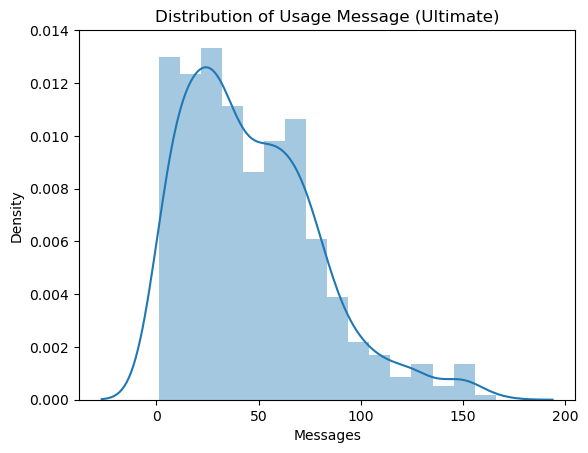

In [112]:
#create a histogram for messages
sns.distplot(df_ultimate['messages']);
plt.title('Distribution of Usage Message (Ultimate)')
plt.xlabel('Messages')
plt.show()

**Hasil temuan analisa**: <a id='message-ult'></a>
1. Rata-rata penggunaan sms paling tinggi ada di bulan Desember dengan jumlah 55 ± 37 sms per bulan
2. Rata-rata penggunaan sms paling rendah ada di bulan Januari dengan jumlah sms 21 ± 18 sms per bulan
3. Distribusi penggunaan sms paling banyak berada di rentang 0 - 50 sms per bulan

**Kesimpulan**: <a id='message-ult-summary'></a>

Jumlah kuota sms untuk paket ultimate adalah 1.000 sms per bulan. Dari data diatas dapat disimpulkan bahwa sebagian besar pengguna paket ultimate tidak menggunakan sms lebih dari kuota yang diberikan.

### Kesimpulan Perilaku Pengguna Paket Data Ultimate <a id='behaviour-ult-summary'></a>

Pengguna paket internet Ultimate cenderung tidak menggunakan kuota paket data, sms, maupun telepon lebih dari yang diberikan.

## Kesimpulan dari Keseluruhan Analisa Data Pengguna <a id='behaviour-plan-summary-total'></a>
Penggunaan paket surf dapat ditingkatkan untuk menambah *revenue* Megaline karena dapat menyumbang pendapatan dari kelebihan penggunaan data apabila menggunakan paket surf.

## Menguji Hipotesis <a id='test-hypothesis'></a>

Beberapa hipotesis yang ingin diuji adalah:
1. Rata-rata pendapatan dari pengguna paket telepon ultimate dan surf
2. Rata-rata pendapatan dari pengguna di wilayah NY-NJ dan wilayah lain

Pengujian hipotesis menggunakan t-test karena variabel yang diuji adalah variabel kategorik (paket telepon dan wilayah) dengan variabel numerik (*revenue*).

### Revenue Paket Surf vs Ultimate <a id='test-hypothesis-package'></a>

Hipotesis yang digunakan adalah:
1. Hipotesis 0 / Null hypothesis = "Rata-rata pendapatan dari pengguna paket telepon ultimate dan surf adalah **sama**"
2. Hipotests 1 / Alternative hypothesis = "Rata-rata pendapatan dari pengguna paket telepon ultimate dan surf adalah **tidak sama**"

In [83]:
# reset index for rev total
rev_total = rev_total.reset_index()

In [84]:
# create a new dataset for determine revenue per package
rev_surf = rev_total.loc[rev_total['plan'] == 'surf']
rev_ult = rev_total.loc[rev_total['plan'] == 'ultimate']

# chek the new dataset
rev_surf

,user_id,plan,revenue
0,1268,surf,1870.86
1,1240,surf,1754.45
2,1292,surf,1700.00
3,1147,surf,1674.83
4,1359,surf,1621.11
...,...,...,...
494,1298,surf,114.29
495,1416,surf,70.00
497,1040,surf,40.00
498,1129,surf,40.00


In [85]:
# check new dataset
rev_ult

,user_id,plan,revenue
6,1028,ultimate,1379.0
9,1490,ultimate,1106.0
12,1144,ultimate,1064.0
14,1038,ultimate,994.0
18,1043,ultimate,938.0
...,...,...,...
265,1441,ultimate,420.0
379,1269,ultimate,280.0
483,1296,ultimate,210.0
487,1006,ultimate,154.0


In [86]:
# check the varians for both package
surf_var = np.var(rev_surf['revenue'])
ult_var = np.var(rev_ult['revenue'])

# print
print('Variance of Revenue in Surf Package =', surf_var)
print('Variance of Revenue in Ultimate Package =', ult_var)

Variance of Revenue in Surf Package = 68582.46626133088
Variance of Revenue in Ultimate Package = 16518.192816635183


In [87]:
# check the difference of the variance
round((surf_var - ult_var) / surf_var * 100, 2)

75.91

Variansi dari kedua dataset berbeda jauh (~76%)

In [88]:
# test the hypothesis
alpha = 0.05

result = st.ttest_ind(rev_surf['revenue'], rev_ult['revenue'], equal_var=False)
print ('p-value =', result.pvalue)

if result.pvalue < alpha:
  print ('The null hypothesis is rejected')
else:
  print ('The null hypothesis is accepted')

p-value = 8.991543570701256e-82
The null hypothesis is rejected


In [89]:
# check the difference
print('Average revenue for Surf Package =', round(rev_surf['revenue'].mean(), 2))
print('Average revenue for Ultimate Package =', round(rev_ult['revenue'].mean(), 2))

Average revenue for Surf Package = 416.42
Average revenue for Ultimate Package = 824.26


### Revenue Wilayah NY-NJ vs Others <a id='test-hypothesis-area'></a>

Hipotesis yang digunakan adalah:
1. Hipotesis 0 / Null hypothesis = "Rata-rata pendapatan dari pengguna di wilayah NY-NJ dan wilayah lain adalah **sama**"
2. Hipotests 1 / Alternative hypothesis = "Rata-rata pendapatan dari pengguna di wilayah NY-NJ dan wilayah lain adalah **tidak sama**"

In [90]:
# check the dataset
df.head()

,user_id,months,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,...,usd_per_minute,gb_per_month_included,gb_used,duration_up,id,extra_cost_internet,extra_cost_call,extra_cost_messages,extra_cost,revenue
0,1000,2018-01,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,1000,30720,3000,70,...,0.01,30.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,70.0
1,1000,2018-02,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,1000,30720,3000,70,...,0.01,30.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,70.0
2,1000,2018-03,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,1000,30720,3000,70,...,0.01,30.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,70.0
3,1000,2018-04,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,1000,30720,3000,70,...,0.01,30.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,70.0
4,1000,2018-05,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,1000,30720,3000,70,...,0.01,30.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,70.0


In [91]:
# create a new dataset
df_city = users.drop(
    ['first_name', 'last_name', 'age', 'reg_date', 'churn_date'], 
    axis=1)

# check the dataset
df_city.head()

,user_id,city,plan
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,"Las Vegas-Henderson-Paradise, NV MSA",surf
3,1003,"Tulsa, OK MSA",surf
4,1004,"Seattle-Tacoma-Bellevue, WA MSA",surf


In [92]:
# clean a dataset
df_city['city_clean'] = df_city['city'].str.split(',').str[1]
df_city['city_clean'] = df_city['city_clean'].str.replace(' MSA', '')

# check the dataset
df_city.head()

,user_id,city,plan,city_clean
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,GA
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,WA
2,1002,"Las Vegas-Henderson-Paradise, NV MSA",surf,NV
3,1003,"Tulsa, OK MSA",surf,OK
4,1004,"Seattle-Tacoma-Bellevue, WA MSA",surf,WA


In [93]:
# flagging the ny-nj city
df_city['ny_nj'] = df_city['city_clean'].str.contains('NY-NJ', regex=True)

# check the dataset
df_city.tail(10)

,user_id,city,plan,city_clean,ny_nj
490,1490,"Sacramento–Roseville–Folsom, CA MSA",ultimate,CA,False
491,1491,"Grand Rapids-Kentwood, MI MSA",surf,MI,False
492,1492,"Portland-Vancouver-Hillsboro, OR-WA MSA",surf,OR-WA,False
493,1493,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,MA-NH,False
494,1494,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,NY-NJ-PA,True
495,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,NY-NJ-PA,True
496,1496,"New Orleans-Metairie, LA MSA",surf,LA,False
497,1497,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate,CA,False
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,NY-NJ-PA,True
499,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,FL,False


In [95]:
# combine the dataset for revenue
df_city_01 = rev_total.merge(df_city, on=['user_id', 'plan'], how='left')

# check the dataset
df_city_01.tail(10)

,user_id,plan,revenue,city,city_clean,ny_nj
490,1315,surf,140.00,"Raleigh-Cary, NC MSA",NC,False
491,1491,surf,120.54,"Grand Rapids-Kentwood, MI MSA",MI,False
492,1012,surf,120.00,"Chicago-Naperville-Elgin, IL-IN-WI MSA",IL-IN-WI,False
493,1281,surf,116.20,"Charlotte-Concord-Gastonia, NC-SC MSA",NC-SC,False
494,1298,surf,114.29,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",TN,False
495,1416,surf,70.00,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",MN-WI,False
496,1186,ultimate,70.00,"Las Vegas-Henderson-Paradise, NV MSA",NV,False
497,1040,surf,40.00,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",PA-NJ-DE-MD,False
498,1129,surf,40.00,"Baton Rouge, LA MSA",LA,False
499,1180,surf,24.23,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True


In [96]:
# create a new dataset for ny-nj and the other
df_nynj = df_city_01.loc[df_city_01['ny_nj'] == True]
df_not_nynj = df_city_01.loc[df_city_01['ny_nj'] == False]

# check the dataset
df_nynj

,user_id,plan,revenue,city,city_clean,ny_nj
10,1251,surf,1097.97,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
11,1418,surf,1080.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
12,1144,ultimate,1064.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
18,1043,ultimate,938.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
27,1215,surf,872.15,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
...,...,...,...,...,...,...
470,1290,surf,240.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
477,1457,surf,240.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
486,1402,surf,170.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
489,1300,surf,150.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True


In [97]:
# check the dataset
df_not_nynj

,user_id,plan,revenue,city,city_clean,ny_nj
0,1268,surf,1870.86,"Fresno, CA MSA",CA,False
1,1240,surf,1754.45,"Baton Rouge, LA MSA",LA,False
2,1292,surf,1700.00,"Dallas-Fort Worth-Arlington, TX MSA",TX,False
3,1147,surf,1674.83,"Urban Honolulu, HI MSA",HI,False
4,1359,surf,1621.11,"Colorado Springs, CO MSA",CO,False
...,...,...,...,...,...,...
494,1298,surf,114.29,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",TN,False
495,1416,surf,70.00,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",MN-WI,False
496,1186,ultimate,70.00,"Las Vegas-Henderson-Paradise, NV MSA",NV,False
497,1040,surf,40.00,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",PA-NJ-DE-MD,False


In [98]:
# check the varians for both package
nynj_var = np.var(df_nynj['revenue'])
not_nynj_var = np.var(df_not_nynj['revenue'])

# print
print('Variance of Revenue in NY-NJ =', nynj_var)
print('Variance of Revenue Not in NY-NJ =', not_nynj_var)

Variance of Revenue in NY-NJ = 74229.82912123442
Variance of Revenue Not in NY-NJ = 90653.5206610797


In [99]:
# check the difference of the variance
round((nynj_var - not_nynj_var) / nynj_var * 100, 2)

-22.13

In [100]:
#test the hypothesis
alpha = 0.05

result_nynj = st.ttest_ind(df_nynj['revenue'], df_not_nynj['revenue'], equal_var=False)
print ('p-value =', result_nynj.pvalue)

if result_nynj.pvalue < alpha:
  print ('The null hypothesis is rejected')
else:
  print ('The null hypothesis is accepted')

p-value = 0.41317807847147303
The null hypothesis is accepted


In [101]:
# check the difference
print('Average revenue for NY-NJ =', round(df_nynj['revenue'].mean(), 2))
print('Average revenue for Not NY-NJ =', round(df_not_nynj['revenue'].mean(), 2))

Average revenue for NY-NJ = 524.29
Average revenue for Not NY-NJ = 552.21


## Kesimpulan Uji Hipotesis <a id='test-hypothesis-summary'></a>

Dari analisa diatas, dapat ditarik 2 kesimpulan:
1. Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda secara signifikan. Rata-rata pendapatan paket paling tinggi adalah paket Ultimate, sehingga *budget* iklan bisa difokuskan untuk promosi paket Ultimate untuk menambah revenue per tahun.

2. Rata-rata pendapatan dari pengguna di wilayah NY-NJ sama dari pengguna di wilayah lain. Sehingga, *budget* iklan tidak hanya difokuskan di satu wilayah saja tapi bisa disemua wilayah. Sehingga, expossure terhadap operator Megaline bisa lebih banyak.

# Kesimpulan Keseluruhan Analisa <a id='end'></a>

Dari hasil analisa diatas, dapat disimpulkan bahwa:
1. Pengguna yang melakukan panggilan cenderung naik setiap bulan selama 2018. Bulan Desember menjadi bulan paling banyak dalam melakukan panggilan
2. Jumlah menit yang digunakan oleh user cenderung naik setiap bulan selama 2018. Bulan Desember menjadi bulan yang paling tinggi dalam pemakaian menit panggilan
3. Jumlah SMS yang dikirim cenderung naik setiap bulan selama 2018 dengan bulan Desember menjadi bulan paling tinggi
4. Jumlah penggunaan data cenderung meningkat setiap bulan selama 2018 dengan bulan desember menjadi bulan paling tinggi
5. Pengguna dengan id 1268 adalah pengguna dengan *revenue* paling besar (1870,86 dollar) dengan paket internet Surf
6. Seluruh pengguna Top 5 penyumbang revenue paling banyak adalah pengguna paket internet Surf
7. Berdasarkan paket pengguna
  - Paket internet surf
    - Rata-rata penggunaan data paling tinggi ada pada bulan Desember dengan distribusi penggunaan data 10-20 gb per user
    - Rata-rata penggunaan telepon paling tinggi ada pada bulan Desember dengan distribusi penggunaan telepon 250-500 menit
    - Rata-rata pengiriman SMS paling tinggi ada pada bulan Desember dengan distribusi penggunaan SMS 0-50 SMS 
  - Paket internet ultimate
    - Rata-rata penggunaan data paling tinggi ada pada bulan Desember dengan distribusi penggunaan data 10-20 gb per user
    - Rata-rata penggunaan telepon paling tinggi ada pada bulan Desember dengan distribusi penggunaan telepon 250-500 menit
    - Rata-rata pengiriman SMS paling tinggi ada pada bulan Desember dengan penggunaan SMS paling tinggi sekitar 250-500 SMS
8. Uji hipotesis menunjukkan bahwa:
    - Rata-rata pendapatan kedua paket telepon (Surf dan Ultimate) berbeda secara signifikan dengan rata-rata pendapatan dari pengguna paket Ultimate lebih tinggi
    - Rata-rata pendapatan dari wilayah NY-NJ dengan wilayah lain tidak berbeda secara signifikan. Untuk meningkatkan *exposure* , *budget* iklan tidak hanya difokuskan pada satu wilayah saja.